# Stereo Assignment
* Stereo Vision
    * Block Matching
    * Dynamic Programming

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
from utils import *


# Block Matching

In [2]:
# Define the path to the images
path = "images"
left = []
right = []
for filename in os.listdir(path):
    fullpath = os.path.join(path, filename)
    img = cv.imread(fullpath, 0)
    if filename.startswith("l"):
        left.append(img)
    else:
        right.append(img)
        

In [3]:
print("Left images: {}".format(len(left)))
print("Right images: {}".format(len(right)))

Left images: 3
Right images: 3


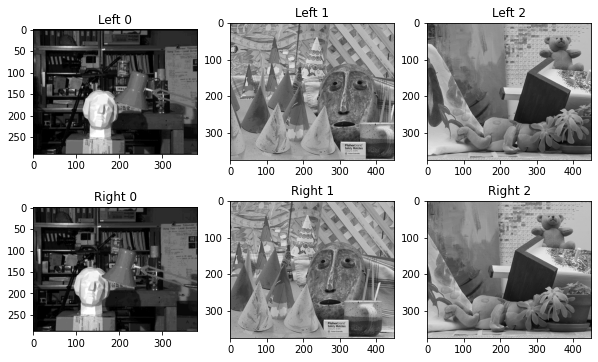

In [4]:
# plot the images
fig, ax = plt.subplots(2, 3, figsize=(10, 6))
for i in range(len(left)):
    ax[0, i].imshow(left[i], cmap="gray")
    ax[0, i].set_title("Left {}".format(i))
    ax[1, i].imshow(right[i], cmap="gray")
    ax[1, i].set_title("Right {}".format(i))
plt.show()


In [5]:
win_size = [1, 5, 9]

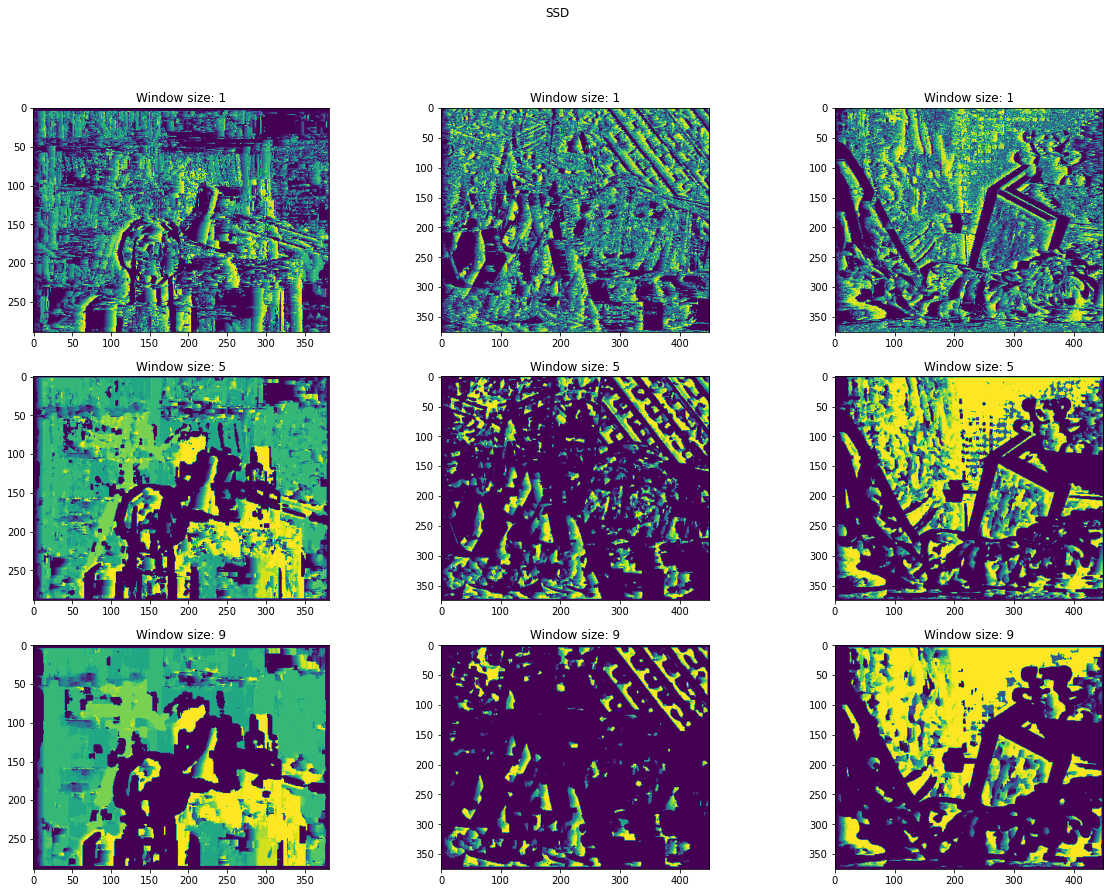

In [6]:
fig , ax = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("SSD")
for i, win in enumerate(win_size):
    for j in range(len(left)):
        ax[i, j].imshow(block_matching(left[j], right[j], window_size=win, max_disparity=16, metric=SSD))
        ax[i, j].set_title("Window size: {}".format(win))
plt.show()

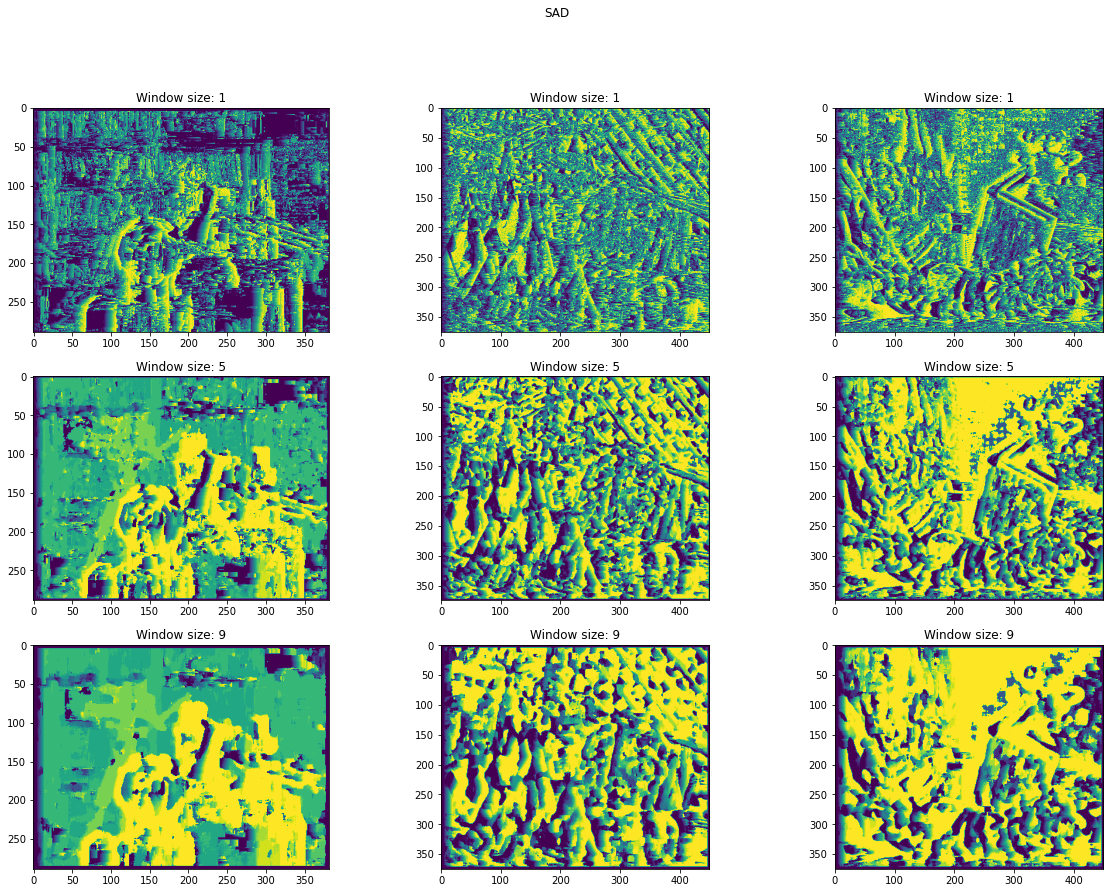

In [7]:
fig , ax = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle("SAD")
for i, win in enumerate(win_size):
    for j in range(len(left)):
        ax[i, j].imshow(block_matching(left[j], right[j], window_size=win, max_disparity=16, metric=SAD))
        ax[i, j].set_title("Window size: {}".format(win))
plt.show()

# Dynamic Programming

In [3]:
sigma = 2; c0 = 1
costs_list = []
disparity_listL = []; disparity_listR = []

for i in range(len(left)):
    print('Processing image {}/{}'.format(i+1, len(left)))

    cost_matrix = dp_forwardpass(left[i], right[i], sigma, c0)
    disparity_mapL, disparity_mapR = dp_backpass(cost_matrix)

    costs_list.append(cost_matrix)
    disparity_listL.append(disparity_mapL); disparity_listR.append(disparity_mapR)


Processing image 1/3


100%|██████████| 289/289 [06:09<00:00,  1.28s/it]


Processing image 2/3


100%|██████████| 375/375 [11:17<00:00,  1.81s/it]


Processing image 3/3


100%|██████████| 375/375 [11:08<00:00,  1.78s/it]


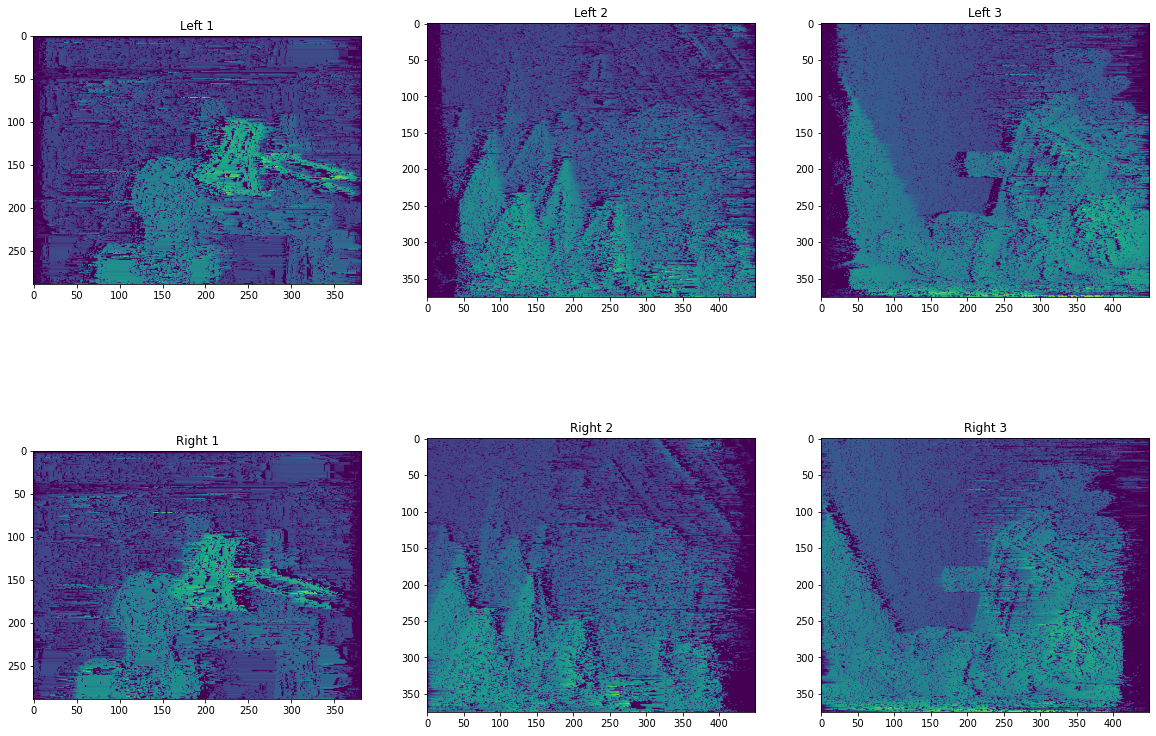

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(20, 14))
for i in range(3):
    ax[0, i].imshow(disparity_listL[i])
    ax[0, i].set_title("Left {}".format(i+1))
    ax[1, i].imshow(disparity_listR[i])
    ax[1, i].set_title("Right {}".format(i+1))
plt.show()